
# <p style="text-align: center; max-height: 500px;">Remaining Useful Life prediction for NASA Turbofan Jet Engines</p>
<center>
  <img src="images\image.png" alt="NASA LOGO">
</center>

### Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import evaluationer # for evaluation of the data
import models # reg and classification models
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split as tts , GridSearchCV
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

### Reading train file

In [2]:
path = r"raw_data\train_FD001.txt"

train_FD001 = pd.read_csv(path, sep=" ", header=None)
train_FD001.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]

##### Dropping columns 26 & 27 due to null colummn generated during file reading

In [3]:
train_FD001.drop(columns= [26,27],inplace= True)
train_FD001

0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1        1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2        1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3        1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4        1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
...    ...  ...     ...     ...    ...     ...     ...      ...      ...   
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          9   ...      16       17       18      19    20   21    22     23  \
0      14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1      14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2      14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3      14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4      14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   
...      ...  ...     ...      ...      ...     ...   ...  ...   ...    ...   
20626  14.62  ...  519.49  2388.26  8137.60  8.4956  0.03  397  2388  100.0   
20627  14.62  ...  519.68  2388.22  8136.50  8.5139  0.03  395  2388  100.0   
20628  14.62  ...  520.01  2388.24  8141.05  8.5646  0.03  398  2388  100.0   
20629  14.62  ...  519.67  2388.23  8139.29  8.5389  0.03  395  2388  100.0   
20630  14.62  ...  519.30  2388.26  8137.33  8.5036  0.03  396  2388  100.0   

          24       25  
0      39.06  23.4190  
1      39.00  23.4236  
2      38.95  23.3442  
3      38.88  23.3739  
4      38.90  23.4044  
...      ...      ...  
20626  38.49  22.9735  
20627  38.30  23.1594  
20628  38.44  22.9333  
20629  38.29  23.0640  
20630  38.37  23.0522  

[20631 rows x 26 columns]

##### Columns names are not defined in text, retriving data from Damage Propagation Modeling pdf file
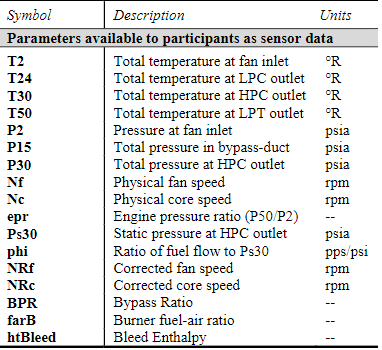 

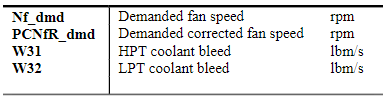

#### using Gemini to find more details for the parameters of sensors

In [4]:
import google.generativeai as genai
genai.configure(api_key="XXXxxxxXXXXxxxxXXX")
# OpenAI API configuration
def get_gemini_response(input):
    model = genai.GenerativeModel('gemini-1.0-pro-latest')
    response = model.generate_content(input)
    return response.text

In [5]:
print(get_gemini_response("In dataset of Nasa Turbofan engine for RUL prediction, define each sensor in detail"))

# result may differ after rerun of Gemini response

**Temperature Sensors (T)**

* **Oil Temperature (T1)**: Measures the temperature of the engine oil in the sump.
* **Oil Filter Temperature (T2)**: Measures the temperature of the oil after it passes through the oil filter.
* **Bearing 1 Inner Race Temperature (T3)**: Measures the temperature of the inner race of the first bearing on the high-pressure compressor rotor.
* **Bearing 2 Inner Race Temperature (T4)**: Measures the temperature of the inner race of the second bearing on the high-pressure compressor rotor.
* **Bearing 3 Inner Race Temperature (T5)**: Measures the temperature of the inner race of the third bearing on the high-pressure compressor rotor.
* **Bearing 4 Inner Race Temperature (T6)**: Measures the temperature of the inner race of the fourth bearing on the high-pressure compressor rotor.
* **Bearing 5 Inner Race Temperature (T7)**: Measures the temperature of the inner race of the fifth bearing on the high-pressure compressor rotor.
* **Bearing 6 Inner Race Temperatu

##### using PDF data and Above data following details about sensors are deducted

Temperature Sensors (s1, s2, s3, s4): Monitor the temperature at various stages of the engine, which can indicate overheating or other thermal issues.

Pressure Sensors (s5, s6, s7, s11): Track pressure changes in different parts of the engine, helping identify leaks or pressure-related failures.

Speed Sensors (s8, s9, s13, s14): Measure the physical and corrected speeds of the fan and core, which can signal mechanical issues or imbalances.

Fuel and Airflow Sensors (s12, s16, s20, s21): Monitor fuel flow, air ratios, and coolant bleed, which are essential for combustion efficiency and overall engine performance.

Other Sensors (s10, s15, s17, s18, s19): Provide additional context on engine performance, including pressure ratios, bypass ratios, and demanded speeds.

#### creating list for columns name to append in dataframe

In [6]:
columns = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

#### imputing column name into dataframe

In [7]:
train_FD001.columns = columns
train_FD001

unit_ID  cycles  setting_1  setting_2  setting_3      T2     T24  \
0            1       1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1       2     0.0019    -0.0003      100.0  518.67  642.15   
2            1       3    -0.0043     0.0003      100.0  518.67  642.35   
3            1       4     0.0007     0.0000      100.0  518.67  642.35   
4            1       5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...     ...        ...        ...        ...     ...     ...   
20626      100     196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100     197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100     198     0.0004     0.0000      100.0  518.67  643.42   
20629      100     199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100     200    -0.0032    -0.0005      100.0  518.67  643.85   

           T30      T50     P2  ...     phi      NRf      NRc     BPR  farB  \
0      1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   
1      1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   
2      1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   
3      1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   
4      1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   
...        ...      ...    ...  ...     ...      ...      ...     ...   ...   
20626  1597.98  1428.63  14.62  ...  519.49  2388.26  8137.60  8.4956  0.03   
20627  1604.50  1433.58  14.62  ...  519.68  2388.22  8136.50  8.5139  0.03   
20628  1602.46  1428.18  14.62  ...  520.01  2388.24  8141.05  8.5646  0.03   
20629  1605.26  1426.53  14.62  ...  519.67  2388.23  8139.29  8.5389  0.03   
20630  1600.38  1432.14  14.62  ...  519.30  2388.26  8137.33  8.5036  0.03   

       htBleed  Nf_dmd  PCNfR_dmd    W31      W32  
0          392    2388      100.0  39.06  23.4190  
1          392    2388      100.0  39.00  23.4236  
2          390    2388      100.0  38.95  23.3442  
3          392    2388      100.0  38.88  23.3739  
4          393    2388      100.0  38.90  23.4044  
...        ...     ...        ...    ...      ...  
20626      397    2388      100.0  38.49  22.9735  
20627      395    2388      100.0  38.30  23.1594  
20628      398    2388      100.0  38.44  22.9333  
20629      395    2388      100.0  38.29  23.0640  
20630      396    2388      100.0  38.37  23.0522  

[20631 rows x 26 columns]

**Note** : unit_ID column represent each engine (i.e., data of 100 engine in train dataset), whereas cycle represent operational cycle of each engine till failure

In [8]:
train_FD001[train_FD001.unit_ID ==1]

unit_ID  cycles  setting_1  setting_2  setting_3      T2     T24  \
0          1       1    -0.0007    -0.0004      100.0  518.67  641.82   
1          1       2     0.0019    -0.0003      100.0  518.67  642.15   
2          1       3    -0.0043     0.0003      100.0  518.67  642.35   
3          1       4     0.0007     0.0000      100.0  518.67  642.35   
4          1       5    -0.0019    -0.0002      100.0  518.67  642.37   
..       ...     ...        ...        ...        ...     ...     ...   
187        1     188    -0.0067     0.0003      100.0  518.67  643.75   
188        1     189    -0.0006     0.0002      100.0  518.67  644.18   
189        1     190    -0.0027     0.0001      100.0  518.67  643.64   
190        1     191    -0.0000    -0.0004      100.0  518.67  643.34   
191        1     192     0.0009    -0.0000      100.0  518.67  643.54   

         T30      T50     P2  ...     phi      NRf      NRc     BPR  farB  \
0    1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   
1    1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   
2    1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   
3    1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   
4    1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   
..       ...      ...    ...  ...     ...      ...      ...     ...   ...   
187  1602.38  1422.78  14.62  ...  519.79  2388.23  8117.69  8.5207  0.03   
188  1596.17  1428.01  14.62  ...  519.58  2388.33  8117.51  8.5183  0.03   
189  1599.22  1425.95  14.62  ...  520.04  2388.35  8112.58  8.5223  0.03   
190  1602.36  1425.77  14.62  ...  519.57  2388.30  8114.61  8.5174  0.03   
191  1601.41  1427.20  14.62  ...  520.08  2388.32  8110.93  8.5113  0.03   

     htBleed  Nf_dmd  PCNfR_dmd    W31      W32  
0        392    2388      100.0  39.06  23.4190  
1        392    2388      100.0  39.00  23.4236  
2        390    2388      100.0  38.95  23.3442  
3        392    2388      100.0  38.88  23.3739  
4        393    2388      100.0  38.90  23.4044  
..       ...     ...        ...    ...      ...  
187      396    2388      100.0  38.51  22.9588  
188      395    2388      100.0  38.48  23.1127  
189      398    2388      100.0  38.49  23.0675  
190      394    2388      100.0  38.45  23.1295  
191      396    2388      100.0  38.48  22.9649  

[192 rows x 26 columns]

Creating a new column for Remaining useful life,

for that End of life (EOL) of each column to be calculate and substract cycle value from it to get Remaining useful life(RUL)

### formulae for RUL

**RUL** = **EOL - Cycle**

In [9]:
train_FD001.unit_ID.nunique()

100

In [10]:
for i in range(1,train_FD001.unit_ID.nunique() +1):
    train_FD001.loc[train_FD001[train_FD001.unit_ID == i].index,"EOL"] = len(train_FD001[train_FD001.unit_ID == i])

In [11]:
train_FD001

unit_ID  cycles  setting_1  setting_2  setting_3      T2     T24  \
0            1       1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1       2     0.0019    -0.0003      100.0  518.67  642.15   
2            1       3    -0.0043     0.0003      100.0  518.67  642.35   
3            1       4     0.0007     0.0000      100.0  518.67  642.35   
4            1       5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...     ...        ...        ...        ...     ...     ...   
20626      100     196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100     197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100     198     0.0004     0.0000      100.0  518.67  643.42   
20629      100     199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100     200    -0.0032    -0.0005      100.0  518.67  643.85   

           T30      T50     P2  ...      NRf      NRc     BPR  farB  htBleed  \
0      1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03      392   
1      1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03      392   
2      1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03      390   
3      1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03      392   
4      1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03      393   
...        ...      ...    ...  ...      ...      ...     ...   ...      ...   
20626  1597.98  1428.63  14.62  ...  2388.26  8137.60  8.4956  0.03      397   
20627  1604.50  1433.58  14.62  ...  2388.22  8136.50  8.5139  0.03      395   
20628  1602.46  1428.18  14.62  ...  2388.24  8141.05  8.5646  0.03      398   
20629  1605.26  1426.53  14.62  ...  2388.23  8139.29  8.5389  0.03      395   
20630  1600.38  1432.14  14.62  ...  2388.26  8137.33  8.5036  0.03      396   

       Nf_dmd  PCNfR_dmd    W31      W32    EOL  
0        2388      100.0  39.06  23.4190  192.0  
1        2388      100.0  39.00  23.4236  192.0  
2        2388      100.0  38.95  23.3442  192.0  
3        2388      100.0  38.88  23.3739  192.0  
4        2388      100.0  38.90  23.4044  192.0  
...       ...        ...    ...      ...    ...  
20626    2388      100.0  38.49  22.9735  200.0  
20627    2388      100.0  38.30  23.1594  200.0  
20628    2388      100.0  38.44  22.9333  200.0  
20629    2388      100.0  38.29  23.0640  200.0  
20630    2388      100.0  38.37  23.0522  200.0  

[20631 rows x 27 columns]

In [12]:
train_FD001["RUL"] = train_FD001["EOL"]-train_FD001["cycles"]
df = train_FD001.drop(columns=['EOL'])
df

unit_ID  cycles  setting_1  setting_2  setting_3      T2     T24  \
0            1       1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1       2     0.0019    -0.0003      100.0  518.67  642.15   
2            1       3    -0.0043     0.0003      100.0  518.67  642.35   
3            1       4     0.0007     0.0000      100.0  518.67  642.35   
4            1       5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...     ...        ...        ...        ...     ...     ...   
20626      100     196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100     197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100     198     0.0004     0.0000      100.0  518.67  643.42   
20629      100     199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100     200    -0.0032    -0.0005      100.0  518.67  643.85   

           T30      T50     P2  ...      NRf      NRc     BPR  farB  htBleed  \
0      1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03      392   
1      1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03      392   
2      1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03      390   
3      1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03      392   
4      1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03      393   
...        ...      ...    ...  ...      ...      ...     ...   ...      ...   
20626  1597.98  1428.63  14.62  ...  2388.26  8137.60  8.4956  0.03      397   
20627  1604.50  1433.58  14.62  ...  2388.22  8136.50  8.5139  0.03      395   
20628  1602.46  1428.18  14.62  ...  2388.24  8141.05  8.5646  0.03      398   
20629  1605.26  1426.53  14.62  ...  2388.23  8139.29  8.5389  0.03      395   
20630  1600.38  1432.14  14.62  ...  2388.26  8137.33  8.5036  0.03      396   

       Nf_dmd  PCNfR_dmd    W31      W32    RUL  
0        2388      100.0  39.06  23.4190  191.0  
1        2388      100.0  39.00  23.4236  190.0  
2        2388      100.0  38.95  23.3442  189.0  
3        2388      100.0  38.88  23.3739  188.0  
4        2388      100.0  38.90  23.4044  187.0  
...       ...        ...    ...      ...    ...  
20626    2388      100.0  38.49  22.9735    4.0  
20627    2388      100.0  38.30  23.1594    3.0  
20628    2388      100.0  38.44  22.9333    2.0  
20629    2388      100.0  38.29  23.0640    1.0  
20630    2388      100.0  38.37  23.0522    0.0  

[20631 rows x 27 columns]

C:\Users\gaura\AppData\Local\Temp\ipykernel_16112\3592677201.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cnt_val), y=list(cnt_ind), palette='magma')


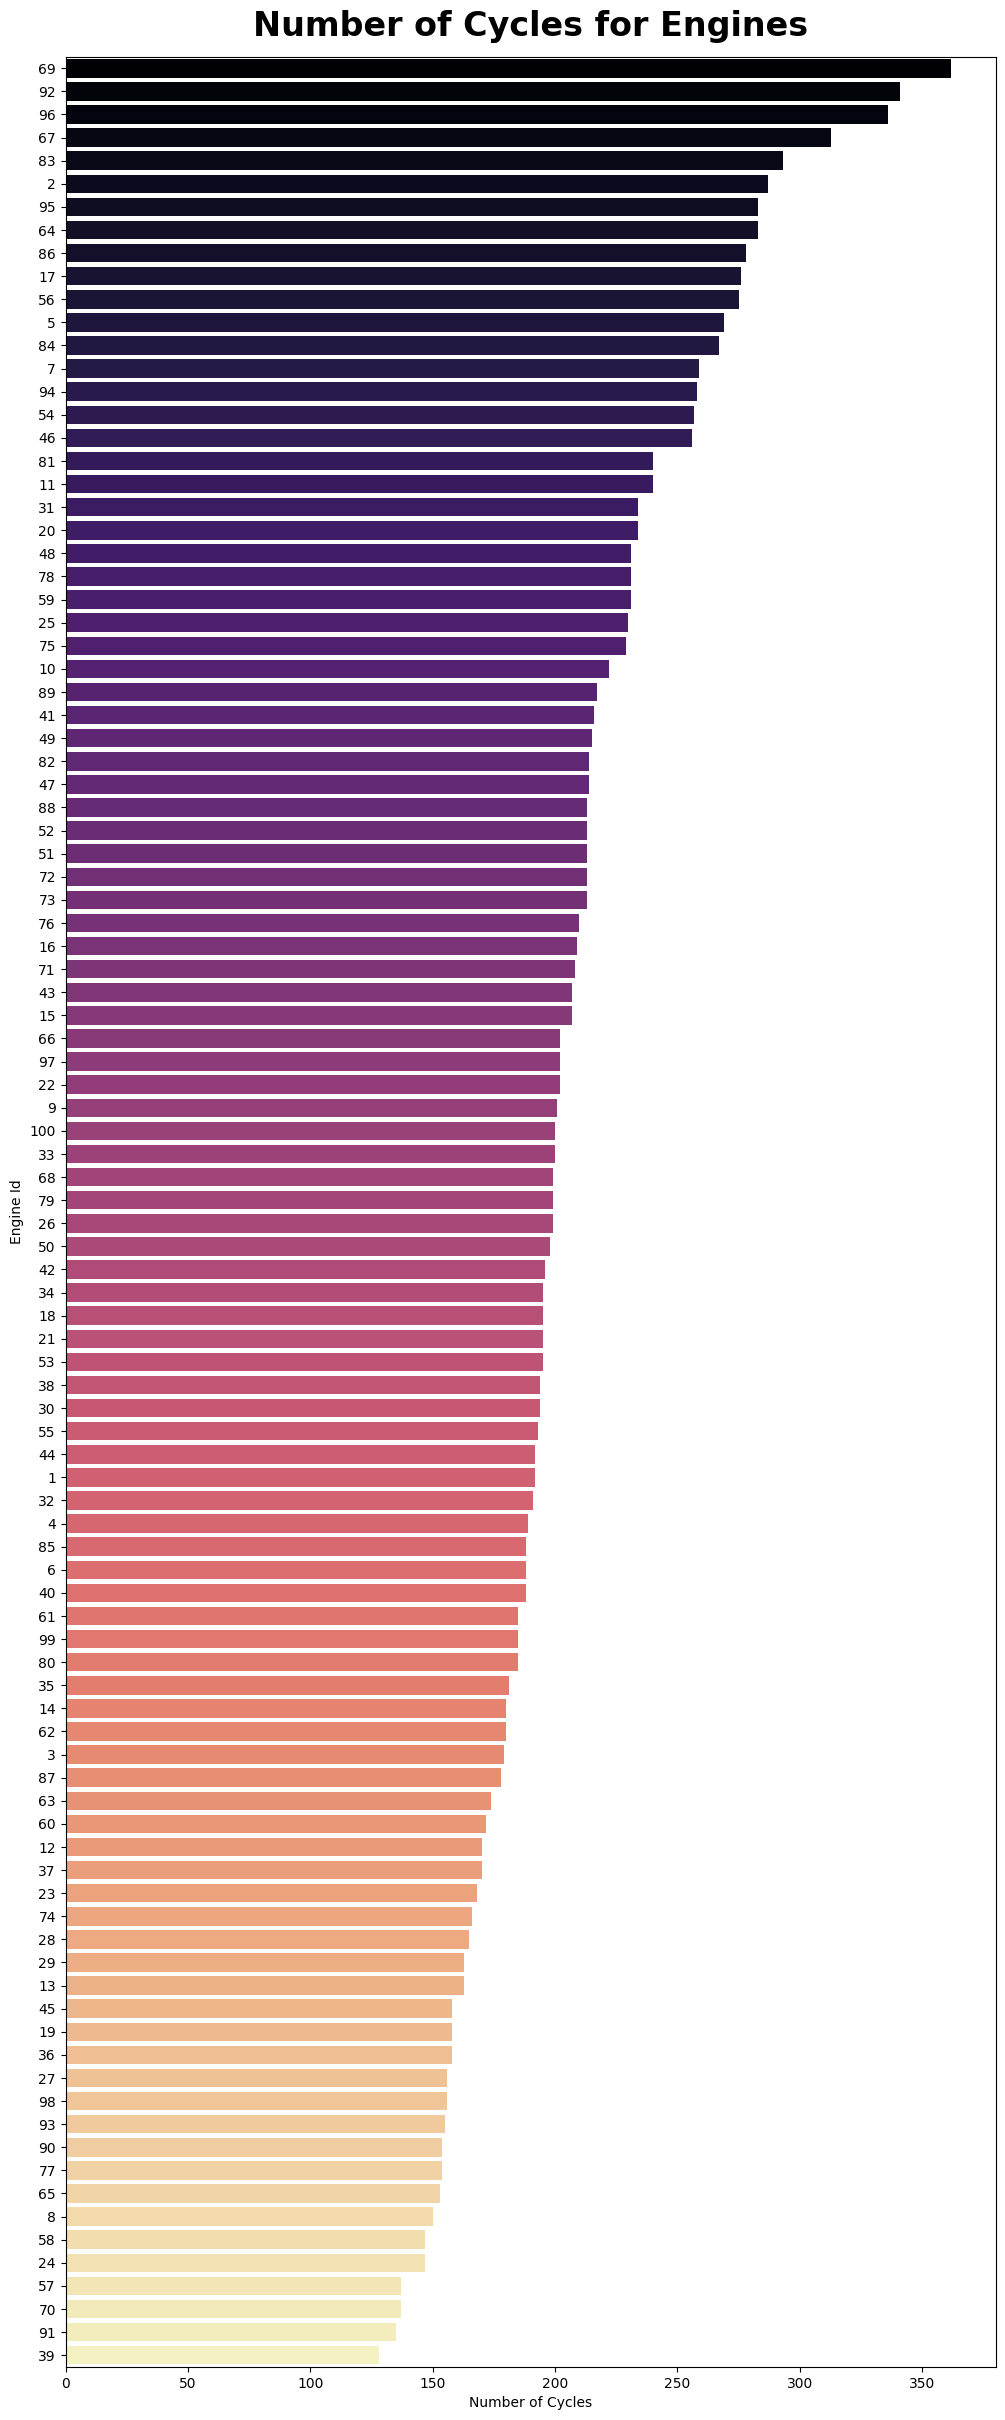

In [13]:
cnt_train = df[["unit_ID", "cycles"]].groupby("unit_ID").max().sort_values(by="cycles", ascending=False)
cnt_ind = [str(i) for i in cnt_train.index.to_list()]
cnt_val = list(cnt_train.cycles.values)

plt.figure(figsize=(12, 30))
sns.barplot(x=list(cnt_val), y=list(cnt_ind), palette='magma')
plt.xlabel('Number of Cycles')
plt.ylabel('Engine Id')
plt.title('Number of Cycles for Engines', fontweight='bold', fontsize=24, pad=15)

plt.show()

### describing each column

In [94]:
df.describe().T

count         mean        std        min        25%        50%  \
cycles   20631.0   108.807862  68.880990     1.0000    52.0000   104.0000   
T24      20631.0   642.680934   0.500053   641.2100   642.3250   642.6400   
T30      20631.0  1590.523119   6.131150  1571.0400  1586.2600  1590.1000   
T50      20631.0  1408.933782   9.000605  1382.2500  1402.3600  1408.0400   
P30      20631.0   553.367711   0.885092   549.8500   552.8100   553.4400   
Nf       20631.0  2388.096652   0.070985  2387.9000  2388.0500  2388.0900   
Nc       20631.0  9065.242941  22.082880  9021.7300  9053.1000  9060.6600   
Ps30     20631.0    47.541168   0.267087    46.8500    47.3500    47.5100   
phi      20631.0   521.413470   0.737553   518.6900   520.9600   521.4800   
NRf      20631.0  2388.096152   0.071919  2387.8800  2388.0400  2388.0900   
NRc      20631.0  8143.752722  19.076176  8099.9400  8133.2450  8140.5400   
BPR      20631.0     8.442146   0.037505     8.3249     8.4149     8.4389   
htBleed  20631.0   393.210654   1.548763   388.0000   392.0000   393.0000   
W31      20631.0    38.816271   0.180746    38.1400    38.7000    38.8300   
W32      20631.0    23.289705   0.108251    22.8942    23.2218    23.2979   
RUL      20631.0   107.807862  68.880990     0.0000    51.0000   103.0000   

               75%        max  
cycles    156.0000   362.0000  
T24       643.0000   644.5300  
T30      1594.3800  1616.9100  
T50      1414.5550  1441.4900  
P30       554.0100   556.0600  
Nf       2388.1400  2388.5600  
Nc       9069.4200  9244.5900  
Ps30       47.7000    48.5300  
phi       521.9500   523.3800  
NRf      2388.1400  2388.5600  
NRc      8148.3100  8293.7200  
BPR         8.4656     8.5848  
htBleed   394.0000   400.0000  
W31        38.9500    39.4300  
W32        23.3668    23.6184  
RUL       155.0000   361.0000

### retriving columns with zero Standard deviation , as they don't contribute in prediction 

In [15]:
no_std_drop_columns = df.describe().loc["std"][df.describe().loc["std"] < 1e-10].index
no_std_drop_columns

Index(['setting_3', 'T2', 'P2', 'epr', 'farB', 'Nf_dmd', 'PCNfR_dmd'], dtype='object')

### checking correlation of RUL column with other columns in train set

In [16]:
df.corr().loc["RUL"]

unit_ID      0.078753
cycles      -0.736241
setting_1   -0.003198
setting_2   -0.001948
setting_3         NaN
T2                NaN
T24         -0.606484
T30         -0.584520
T50         -0.678948
P2                NaN
P15         -0.128348
P30          0.657223
Nf          -0.563968
Nc          -0.390102
epr               NaN
Ps30        -0.696228
phi          0.671983
NRf         -0.562569
NRc         -0.306769
BPR         -0.642667
farB              NaN
htBleed     -0.606154
Nf_dmd            NaN
PCNfR_dmd         NaN
W31          0.629428
W32          0.635662
RUL          1.000000
Name: RUL, dtype: float64

### Columns where Correlation value is less than 0.3 with respect to RUL column as they contribute little to no Contribution in prediction

In [17]:
low_corr_cols = abs(df.corr().loc["RUL"])[abs(df.corr().loc["RUL"]) <0.3 ].index
low_corr_cols

Index(['unit_ID', 'setting_1', 'setting_2', 'P15'], dtype='object')

In [18]:
# Dropping Columns 
drop_cols = set(no_std_drop_columns)  | set(low_corr_cols)
drop_cols = list(drop_cols)
drop_cols

['farB',
 'PCNfR_dmd',
 'setting_1',
 'P15',
 'unit_ID',
 'Nf_dmd',
 'T2',
 'epr',
 'setting_2',
 'P2',
 'setting_3']

In [19]:

df.drop(columns= drop_cols,inplace = True)
df

cycles     T24      T30      T50     P30       Nf       Nc   Ps30  \
0           1  641.82  1589.70  1400.60  554.36  2388.06  9046.19  47.47   
1           2  642.15  1591.82  1403.14  553.75  2388.04  9044.07  47.49   
2           3  642.35  1587.99  1404.20  554.26  2388.08  9052.94  47.27   
3           4  642.35  1582.79  1401.87  554.45  2388.11  9049.48  47.13   
4           5  642.37  1582.85  1406.22  554.00  2388.06  9055.15  47.28   
...       ...     ...      ...      ...     ...      ...      ...    ...   
20626     196  643.49  1597.98  1428.63  551.43  2388.19  9065.52  48.07   
20627     197  643.54  1604.50  1433.58  550.86  2388.23  9065.11  48.04   
20628     198  643.42  1602.46  1428.18  550.94  2388.24  9065.90  48.09   
20629     199  643.23  1605.26  1426.53  550.68  2388.25  9073.72  48.39   
20630     200  643.85  1600.38  1432.14  550.79  2388.26  9061.48  48.20   

          phi      NRf      NRc     BPR  htBleed    W31      W32    RUL  
0      521.66  2388.02  8138.62  8.4195      392  39.06  23.4190  191.0  
1      522.28  2388.07  8131.49  8.4318      392  39.00  23.4236  190.0  
2      522.42  2388.03  8133.23  8.4178      390  38.95  23.3442  189.0  
3      522.86  2388.08  8133.83  8.3682      392  38.88  23.3739  188.0  
4      522.19  2388.04  8133.80  8.4294      393  38.90  23.4044  187.0  
...       ...      ...      ...     ...      ...    ...      ...    ...  
20626  519.49  2388.26  8137.60  8.4956      397  38.49  22.9735    4.0  
20627  519.68  2388.22  8136.50  8.5139      395  38.30  23.1594    3.0  
20628  520.01  2388.24  8141.05  8.5646      398  38.44  22.9333    2.0  
20629  519.67  2388.23  8139.29  8.5389      395  38.29  23.0640    1.0  
20630  519.30  2388.26  8137.33  8.5036      396  38.37  23.0522    0.0  

[20631 rows x 16 columns]

In [20]:
df[df.RUL == 0]

cycles     T24      T30      T50     P30       Nf       Nc   Ps30  \
191       192  643.54  1601.41  1427.20  551.25  2388.32  9033.22  48.25   
478       287  643.85  1608.50  1430.84  551.66  2388.20  9109.36  48.12   
657       179  643.51  1604.80  1428.23  551.91  2388.14  9197.52  48.09   
846       189  644.53  1612.11  1432.55  551.93  2388.13  9198.32  48.15   
1115      269  643.46  1597.28  1430.74  550.77  2388.18  9157.05  48.26   
...       ...     ...      ...      ...     ...      ...      ...    ...   
19887     336  643.74  1599.20  1432.12  550.78  2388.28  9075.64  48.17   
20089     202  643.79  1610.66  1427.41  551.55  2388.15  9208.02  47.94   
20245     156  643.02  1603.77  1432.16  551.52  2388.24  9058.54  48.29   
20430     185  643.93  1598.42  1421.56  550.64  2388.29  9050.61  48.29   
20630     200  643.85  1600.38  1432.14  550.79  2388.26  9061.48  48.20   

          phi      NRf      NRc     BPR  htBleed    W31      W32  RUL  
191    520.08  2388.32  8110.93  8.5113      396  38.48  22.9649  0.0  
478    519.81  2388.21  8175.57  8.5365      398  38.43  23.0848  0.0  
657    519.53  2388.20  8255.34  8.5056      398  38.40  22.9562  0.0  
846    519.84  2388.16  8259.42  8.5246      398  38.44  23.1006  0.0  
1115   519.86  2388.16  8212.75  8.5209      397  38.45  23.0296  0.0  
...       ...      ...      ...     ...      ...    ...      ...  ...  
19887  519.18  2388.24  8144.03  8.5022      397  38.36  23.0258  0.0  
20089  519.91  2388.15  8263.63  8.5277      397  38.29  23.1184  0.0  
20245  519.55  2388.26  8122.22  8.5308      396  38.33  23.1137  0.0  
20430  519.99  2388.24  8127.53  8.5425      397  38.49  23.1931  0.0  
20630  519.30  2388.26  8137.33  8.5036      396  38.37  23.0522  0.0  

[100 rows x 16 columns]

In [21]:
df.to_csv("processed_data/train_FD001.csv",index= False)

### Similarly, creating processed data for test data

In [22]:
path = r"raw_data\test_FD001.txt"

temp_df = pd.read_csv(path, sep=" ", header=None)
temp_df.drop(columns= [26,27],inplace= True)
columns = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
temp_df.columns = columns
for j in range(1,temp_df.unit_ID.nunique() +1):
    temp_df.loc[temp_df[temp_df.unit_ID == j].index,"EOL"] = len(temp_df[temp_df.unit_ID == j])
temp_rul = pd.read_csv(r"raw_data\RUL_FD001.txt", sep=" ", header=None)
temp_rul[1] = temp_rul.index +1
temp_rul.columns = ["RUL", "unit_ID"]

temp_df = temp_df.merge(temp_rul, on='unit_ID', how='left')
temp_df["RUL"] = temp_df["EOL"] + temp_df['RUL'] - temp_df['cycles']
temp_df.drop(columns = "EOL",inplace = True)
temp_df.drop(columns= drop_cols,inplace = True)
temp_df.to_csv(f"processed_data/test_FD001.csv",index= False)

### DataFrame of Train for modelling

In [23]:
df = pd.read_csv(r"processed_data\train_FD001.csv")
df

cycles     T24      T30      T50     P30       Nf       Nc   Ps30  \
0           1  641.82  1589.70  1400.60  554.36  2388.06  9046.19  47.47   
1           2  642.15  1591.82  1403.14  553.75  2388.04  9044.07  47.49   
2           3  642.35  1587.99  1404.20  554.26  2388.08  9052.94  47.27   
3           4  642.35  1582.79  1401.87  554.45  2388.11  9049.48  47.13   
4           5  642.37  1582.85  1406.22  554.00  2388.06  9055.15  47.28   
...       ...     ...      ...      ...     ...      ...      ...    ...   
20626     196  643.49  1597.98  1428.63  551.43  2388.19  9065.52  48.07   
20627     197  643.54  1604.50  1433.58  550.86  2388.23  9065.11  48.04   
20628     198  643.42  1602.46  1428.18  550.94  2388.24  9065.90  48.09   
20629     199  643.23  1605.26  1426.53  550.68  2388.25  9073.72  48.39   
20630     200  643.85  1600.38  1432.14  550.79  2388.26  9061.48  48.20   

          phi      NRf      NRc     BPR  htBleed    W31      W32    RUL  
0      521.66  2388.02  8138.62  8.4195      392  39.06  23.4190  191.0  
1      522.28  2388.07  8131.49  8.4318      392  39.00  23.4236  190.0  
2      522.42  2388.03  8133.23  8.4178      390  38.95  23.3442  189.0  
3      522.86  2388.08  8133.83  8.3682      392  38.88  23.3739  188.0  
4      522.19  2388.04  8133.80  8.4294      393  38.90  23.4044  187.0  
...       ...      ...      ...     ...      ...    ...      ...    ...  
20626  519.49  2388.26  8137.60  8.4956      397  38.49  22.9735    4.0  
20627  519.68  2388.22  8136.50  8.5139      395  38.30  23.1594    3.0  
20628  520.01  2388.24  8141.05  8.5646      398  38.44  22.9333    2.0  
20629  519.67  2388.23  8139.29  8.5389      395  38.29  23.0640    1.0  
20630  519.30  2388.26  8137.33  8.5036      396  38.37  23.0522    0.0  

[20631 rows x 16 columns]

In [24]:
test = pd.read_csv(r"processed_data\test_FD001.csv")
test

cycles     T24      T30      T50     P30       Nf       Nc   Ps30  \
0           1  643.02  1585.29  1398.21  553.90  2388.04  9050.17  47.20   
1           2  641.71  1588.45  1395.42  554.85  2388.01  9054.42  47.50   
2           3  642.46  1586.94  1401.34  554.11  2388.05  9056.96  47.50   
3           4  642.44  1584.12  1406.42  554.07  2388.03  9045.29  47.28   
4           5  642.51  1587.19  1401.92  554.16  2388.01  9044.55  47.31   
...       ...     ...      ...      ...     ...      ...      ...    ...   
13091     194  643.24  1599.45  1415.79  553.41  2388.02  9142.37  47.69   
13092     195  643.22  1595.69  1422.05  553.22  2388.05  9140.68  47.60   
13093     196  643.44  1593.15  1406.82  553.04  2388.11  9146.81  47.57   
13094     197  643.26  1594.99  1419.36  553.37  2388.07  9148.85  47.61   
13095     198  642.95  1601.62  1424.99  552.48  2388.06  9155.03  47.80   

          phi      NRf      NRc     BPR  htBleed    W31      W32    RUL  
0      521.72  2388.03  8125.55  8.4052      392  38.86  23.3735  142.0  
1      522.16  2388.06  8139.62  8.3803      393  39.02  23.3916  141.0  
2      521.97  2388.03  8130.10  8.4441      393  39.08  23.4166  140.0  
3      521.38  2388.05  8132.90  8.3917      391  39.00  23.3737  139.0  
4      522.15  2388.03  8129.54  8.4031      390  38.99  23.4130  138.0  
...       ...      ...      ...     ...      ...    ...      ...    ...  
13091  520.69  2388.00  8213.28  8.4715      394  38.65  23.1974   24.0  
13092  521.05  2388.09  8210.85  8.4512      395  38.57  23.2771   23.0  
13093  521.18  2388.04  8217.24  8.4569      395  38.62  23.2051   22.0  
13094  521.33  2388.08  8220.48  8.4711      395  38.66  23.2699   21.0  
13095  521.07  2388.05  8214.64  8.4903      396  38.70  23.1855   20.0  

[13096 rows x 16 columns]

### Data Split in Train and Validation

In [25]:
X = df.drop(columns = ["RUL"])
y = df.RUL
X_train,X_test,y_train,y_test = tts(X,y,test_size= 0.2,random_state=42)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16504, 15), (4127, 15), (16504,), (4127,))

### Model Training on regression Algorithm for baseline evaluation

In [27]:
for i in range(1,14):
    model = models.Regression_models.values.tolist()[i][0]
    evaluationer.evaluation(f"baseline",X_train,X_test,y_train,y_test,model, root_mean_squared_error,"reg")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2923
[LightGBM] [Info] Number of data points in the train set: 16504, number of used features: 15
[LightGBM] [Info] Start training from score 107.559683


## Baseline algorithm performance 

In [28]:
evaluationer.reg_evaluation_df.sort_values(by = "test_r2")

evaluation_df_method                                              model  \
8              baseline                            DecisionTreeRegressor()   
11             baseline                                     MLPRegressor()   
4              baseline  (DecisionTreeRegressor(max_depth=3, random_sta...   
2              baseline                                       ElasticNet()   
1              baseline                                            Lasso()   
7              baseline                              KNeighborsRegressor()   
0              baseline                                            Ridge()   
9              baseline  XGBRegressor(base_score=None, booster=None, ca...   
10             baseline  XGBRFRegressor(base_score=None, booster=None, ...   
3              baseline  (DecisionTreeRegressor(max_features=1.0, rando...   
5              baseline  ([DecisionTreeRegressor(criterion='friedman_ms...   
12             baseline                                    LGBMRegressor()   
6              baseline                    HistGradientBoostingRegressor()   

                     method  train_r2   test_r2  adjusted_r2_train  \
8   root_mean_squared_error  1.000000  0.401691           1.000000   
11  root_mean_squared_error  0.522758  0.531295           0.522324   
4   root_mean_squared_error  0.659821  0.633689           0.659512   
2   root_mean_squared_error  0.643064  0.644871           0.642739   
1   root_mean_squared_error  0.648351  0.648022           0.648031   
7   root_mean_squared_error  0.773226  0.654792           0.773020   
0   root_mean_squared_error  0.655289  0.654849           0.654975   
9   root_mean_squared_error  0.894135  0.689566           0.894039   
10  root_mean_squared_error  0.737157  0.713257           0.736917   
3   root_mean_squared_error  0.961557  0.718005           0.961522   
5   root_mean_squared_error  0.746690  0.721632           0.746460   
12  root_mean_squared_error  0.805466  0.722658           0.805290   
6   root_mean_squared_error  0.789164  0.723444           0.788972   

    adjusted_r2_test  train_evaluation  test_evaluation  
8           0.399508          0.000000        52.283391  
11          0.529585         47.801813        46.275439  
4           0.632352         40.357898        40.909680  
2           0.643575         41.340003        40.280407  
1           0.646737         41.032663        40.101328  
7           0.653532         32.951200        39.713798  
0           0.653590         40.625868        39.710500  
9           0.688433         22.513915        37.660473  
10          0.712211         35.475095        36.194891  
3           0.716976         13.566958        35.893982  
5           0.720616         34.825785        35.662421  
12          0.721646         30.519136        35.596621  
6           0.722435         31.772188        35.546128

In [29]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)

test_scaled = scaler.transform(X_test)


In [30]:
for i in range(1,14):
    model = models.Regression_models.values.tolist()[i][0]
    evaluationer.evaluation(f"baseline scaled",X_scaled,test_scaled,y_train,y_test,model, root_mean_squared_error,"reg")
evaluationer.reg_evaluation_df.sort_values(by = "test_r2")

c:\Users\gaura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2923
[LightGBM] [Info] Number of data points in the train set: 16504, number of used features: 15
[LightGBM] [Info] Start training from score 107.559683


evaluation_df_method                                              model  \
21      baseline scaled                            DecisionTreeRegressor()   
8              baseline                            DecisionTreeRegressor()   
11             baseline                                     MLPRegressor()   
4              baseline  (DecisionTreeRegressor(max_depth=3, random_sta...   
15      baseline scaled                                       ElasticNet()   
17      baseline scaled  (DecisionTreeRegressor(max_depth=3, random_sta...   
2              baseline                                       ElasticNet()   
1              baseline                                            Lasso()   
7              baseline                              KNeighborsRegressor()   
0              baseline                                            Ridge()   
14      baseline scaled                                            Lasso()   
13      baseline scaled                                            Ridge()   
20      baseline scaled                              KNeighborsRegressor()   
9              baseline  XGBRegressor(base_score=None, booster=None, ca...   
22      baseline scaled  XGBRegressor(base_score=None, booster=None, ca...   
23      baseline scaled  XGBRFRegressor(base_score=None, booster=None, ...   
10             baseline  XGBRFRegressor(base_score=None, booster=None, ...   
16      baseline scaled  (DecisionTreeRegressor(max_features=1.0, rando...   
3              baseline  (DecisionTreeRegressor(max_features=1.0, rando...   
18      baseline scaled  ([DecisionTreeRegressor(criterion='friedman_ms...   
5              baseline  ([DecisionTreeRegressor(criterion='friedman_ms...   
25      baseline scaled                                    LGBMRegressor()   
12             baseline                                    LGBMRegressor()   
6              baseline                    HistGradientBoostingRegressor()   
19      baseline scaled                    HistGradientBoostingRegressor()   
24      baseline scaled                                     MLPRegressor()   

                     method  train_r2   test_r2  adjusted_r2_train  \
21  root_mean_squared_error  1.000000  0.399886           1.000000   
8   root_mean_squared_error  1.000000  0.401691           1.000000   
11  root_mean_squared_error  0.522758  0.531295           0.522324   
4   root_mean_squared_error  0.659821  0.633689           0.659512   
15  root_mean_squared_error  0.637983  0.634303           0.637653   
17  root_mean_squared_error  0.662008  0.635249           0.661701   
2   root_mean_squared_error  0.643064  0.644871           0.642739   
1   root_mean_squared_error  0.648351  0.648022           0.648031   
7   root_mean_squared_error  0.773226  0.654792           0.773020   
0   root_mean_squared_error  0.655289  0.654849           0.654975   
14  root_mean_squared_error  0.654787  0.654897           0.654473   
13  root_mean_squared_error  0.655295  0.654978           0.654981   
20  root_mean_squared_error  0.778980  0.662347           0.778779   
9   root_mean_squared_error  0.894135  0.689566           0.894039   
22  root_mean_squared_error  0.894135  0.689566           0.894039   
23  root_mean_squared_error  0.737157  0.713257           0.736917   
10  root_mean_squared_error  0.737157  0.713257           0.736917   
16  root_mean_squared_error  0.961283  0.715677           0.961248   
3   root_mean_squared_error  0.961557  0.718005           0.961522   
18  root_mean_squared_error  0.746690  0.721578           0.746460   
5   root_mean_squared_error  0.746690  0.721632           0.746460   
25  root_mean_squared_error  0.805993  0.721967           0.805817   
12  root_mean_squared_error  0.805466  0.722658           0.805290   
6   root_mean_squared_error  0.789164  0.723444           0.788972   
19  root_mean_squared_error  0.792950  0.724580           0.792762   
24  root_mean_squared_error  0.741111  0.730637           0.740875   

    a

#### Selecting optimum model based on R2_score of train and test i.e., RandomForestRegressor

In [32]:
best_model = evaluationer.reg_evaluation_df.loc[25,"model"]
best_model

LGBMRegressor()

#### Insight of baseline model - Random forest regressor is overfitting on train set with a R2_score of >96%, while on test set r2_score is ~63%

### Predicting on Test Dataset for R2_score

In [33]:
test = pd.read_csv(r"processed_data\test_FD001.csv")
test_X = test.drop(columns = "RUL")
y_true = test.RUL
y_pred = best_model.predict(test_X)
print(f"Test{i} RMSE- {root_mean_squared_error(y_true,y_pred)}")
from sklearn.metrics import root_mean_squared_error,r2_score
test_r2 = r2_score(y_true, y_pred)  # evaluating r2 score for test
n_r_train, n_c_train = X_train.shape # getting no of rows and columns of train data
n_r_test,  n_c_test = X_test.shape # getting no of rows and columns of test data
adj_r2_test = 1 - ((1 - test_r2)*(n_r_test - 1)/ (n_r_test - n_c_test - 1)) # evaluating adjusted r2 score for test
print(f"Test{i} r2_score & adjusted r2_sore {test_r2,adj_r2_test}")
print("----------------------")

Test13 RMSE- 135.9617844319657
Test13 r2_score & adjusted r2_sore (-4.314417369216246, -4.333808335048949)
----------------------


In [34]:
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.6, 0.8]
}

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2923
[LightGBM] [Info] Number of data points in the train set: 16504, number of used features: 15
[LightGBM] [Info] Start training from score 107.559683
Best parameters found: {'learning_rate': 0.05, 'min_child_samples': 100, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.6}
Best score: -1303.5299847626457


In [35]:
test = pd.read_csv(r"processed_data\test_FD001.csv")
test_X = test.drop(columns = "RUL")
y_true = test.RUL
y_pred = grid_search.predict(test_X)
print(f"Test{i} RMSE- {root_mean_squared_error(y_true,y_pred)}")
from sklearn.metrics import root_mean_squared_error,r2_score
test_r2 = r2_score(y_true, y_pred)  # evaluating r2 score for test
n_r_train, n_c_train = X_train.shape # getting no of rows and columns of train data
n_r_test,  n_c_test = X_test.shape # getting no of rows and columns of test data
adj_r2_test = 1 - ((1 - test_r2)*(n_r_test - 1)/ (n_r_test - n_c_test - 1)) # evaluating adjusted r2 score for test
print(f"Test{i} r2_score & adjusted r2_sore {test_r2,adj_r2_test}")
print("----------------------")

Test13 RMSE- 41.04137791690276
Test13 r2_score & adjusted r2_sore (0.5157542545616284, 0.5139873642231279)
----------------------


#### Test data insight and result
the test data showcase that, due to overfitting it has very low r2_score prediction, there is a need to fine tune model so that prediction can be improved.

### Fine Tuning RandomForestRegressor

In [36]:
best_model = evaluationer.reg_evaluation_df.loc[3,"model"]
best_model

RandomForestRegressor()

## using GridSearchCV for model fine tuning for finding best params


In [37]:
param_grid = {
    'n_estimators': [200],
    'max_depth': [10,12],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2,4]
}

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best R² score found: ", grid_search.best_score_)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
r2 = best_rf.score(X_test, y_pred)
print("Test R² score: ", r2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best R² score found:  0.7279053878893136
Test R² score:  1.0


### after applying gridsearchcv for best params checking on test data

In [38]:
test = pd.read_csv(r"processed_data\test_FD001.csv")
test_X = test.drop(columns = "RUL")
y_true = test.RUL
y_pred = best_rf.predict(test_X)
print(f"Test{i} RMSE- {root_mean_squared_error(y_true,y_pred)}")
from sklearn.metrics import root_mean_squared_error,r2_score
test_r2 = r2_score(y_true, y_pred)  # evaluating r2 score for test
n_r_train, n_c_train = X_train.shape # getting no of rows and columns of train data
n_r_test,  n_c_test = X_test.shape # getting no of rows and columns of test data
adj_r2_test = 1 - ((1 - test_r2)*(n_r_test - 1)/ (n_r_test - n_c_test - 1)) # evaluating adjusted r2 score for test
print(f"Test{i} r2_score & adjusted r2_sore {test_r2,adj_r2_test}")
print("----------------------")

Test13 RMSE- 41.12819435626568
Test13 r2_score & adjusted r2_sore (0.5137033996204275, 0.5119290262305727)
----------------------


#### there is an improvement on test data after best params finding but still model is underperforming,
for further improvement performing EDA on the data

# EDA

In [55]:
df.describe().T

count         mean        std        min        25%  \
Cycle            20631.0   108.807862  68.880990     1.0000    52.0000   
SensorMeasure2   20631.0   642.680934   0.500053   641.2100   642.3250   
SensorMeasure3   20631.0  1590.523119   6.131150  1571.0400  1586.2600   
SensorMeasure4   20631.0  1408.933782   9.000605  1382.2500  1402.3600   
SensorMeasure7   20631.0   553.367711   0.885092   549.8500   552.8100   
SensorMeasure8   20631.0  2388.096652   0.070985  2387.9000  2388.0500   
SensorMeasure9   20631.0  9065.242941  22.082880  9021.7300  9053.1000   
SensorMeasure11  20631.0    47.541168   0.267087    46.8500    47.3500   
SensorMeasure12  20631.0   521.413470   0.737553   518.6900   520.9600   
SensorMeasure13  20631.0  2388.096152   0.071919  2387.8800  2388.0400   
SensorMeasure14  20631.0  8143.752722  19.076176  8099.9400  8133.2450   
SensorMeasure15  20631.0     8.442146   0.037505     8.3249     8.4149   
SensorMeasure17  20631.0   393.210654   1.548763   388.0000   392.0000   
SensorMeasure20  20631.0    38.816271   0.180746    38.1400    38.7000   
SensorMeasure21  20631.0    23.289705   0.108251    22.8942    23.2218   
RUL              20631.0   107.807862  68.880990     0.0000    51.0000   

                       50%        75%        max  
Cycle             104.0000   156.0000   362.0000  
SensorMeasure2    642.6400   643.0000   644.5300  
SensorMeasure3   1590.1000  1594.3800  1616.9100  
SensorMeasure4   1408.0400  1414.5550  1441.4900  
SensorMeasure7    553.4400   554.0100   556.0600  
SensorMeasure8   2388.0900  2388.1400  2388.5600  
SensorMeasure9   9060.6600  9069.4200  9244.5900  
SensorMeasure11    47.5100    47.7000    48.5300  
SensorMeasure12   521.4800   521.9500   523.3800  
SensorMeasure13  2388.0900  2388.1400  2388.5600  
SensorMeasure14  8140.5400  8148.3100  8293.7200  
SensorMeasure15     8.4389     8.4656     8.5848  
SensorMeasure17   393.0000   394.0000   400.0000  
SensorMeasure20    38.8300    38.9500    39.4300  
SensorMeasure21    23.2979    23.3668    23.6184  
RUL               103.0000   155.0000   361.0000

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cycle            20631 non-null  int64  
 1   SensorMeasure2   20631 non-null  float64
 2   SensorMeasure3   20631 non-null  float64
 3   SensorMeasure4   20631 non-null  float64
 4   SensorMeasure7   20631 non-null  float64
 5   SensorMeasure8   20631 non-null  float64
 6   SensorMeasure9   20631 non-null  float64
 7   SensorMeasure11  20631 non-null  float64
 8   SensorMeasure12  20631 non-null  float64
 9   SensorMeasure13  20631 non-null  float64
 10  SensorMeasure14  20631 non-null  float64
 11  SensorMeasure15  20631 non-null  float64
 12  SensorMeasure17  20631 non-null  int64  
 13  SensorMeasure20  20631 non-null  float64
 14  SensorMeasure21  20631 non-null  float64
 15  RUL              20631 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 2.5 MB


In [57]:
import plotly.express as px
corr_matrix = df.corr()
fig = px.imshow(corr_matrix, color_continuous_scale='RdBu')

# Add annotations to the heatmap
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        fig.add_annotation(
            x=i, y=j,
            text=str(round(corr_matrix.iloc[i, j], 2)),
            showarrow=False,
            font=dict(color='black')
        )

# Update the layout to ensure annotations are displayed properly
fig.update_layout(
    xaxis=dict(side="top"),
    width=600,
    height=600,
    margin=dict(l=20, r=20, t=40, b=20)
)

# Show the plot
fig.show()

In [58]:
def detect_outliers(df,num_cols):
    global outlier_df,zscore_cols,outlier_indexes,iqr_cols
    outlier_df = pd.DataFrame({"method" :[],"columns name":[],"upper limit":[],
                           "lower limit":[],"no of Rows":[],"percentage outlier":[]})
    if type(num_cols) == list:
        if len(num_cols)!=0:
            num_cols = num_cols
        else:
            num_cols = df.select_dtypes(exclude = "object").columns.tolist()
    else:
        if num_cols.tolist() != None:
            num_cols = num_cols
        else:
            num_cols = df.select_dtypes(exclude = "object").columns.tolist()
    zscore_cols = []
    iqr_cols = []
    outlier_indexes =[]
    for col in num_cols:
        skewness = df[col].skew()
        if -0.5 <= skewness <= 0.5:
            method = "zscore"
            zscore_cols.append(col)

        else:
            method = "iqr"
            iqr_cols.append(col)
    if len(zscore_cols) >0:
        for col in zscore_cols:
            mean = df[col].mean()
            std = df[col].std()
            ul = mean + (3*std)
            ll = mean - (3*std)
            mask = (df[col] < ll) | (df[col] > ul)
            temp = df[mask]

            Zscore_index = temp.index.tolist()
            outlier_indexes.extend(Zscore_index)

            if len(temp)>0:

                temp_df = pd.DataFrame({"method" : ["ZScore"],
                "columns name" : [col],
                "upper limit" : [round(ul,2)],
                "lower limit" :[ round(ll,2)],
                "no of Rows" : [len(temp)],
                "percentage outlier" : [round(len(temp)*100/len(df),2)]})
                
                outlier_df = pd.concat([outlier_df,temp_df]).reset_index(drop = True)

    else:
        print("No columns for Zscore method")
       
    
    if len(iqr_cols) >0:
        for col in iqr_cols:
            q3 = df[col].quantile(.75)
            q1 = df[col].quantile(.25)
            IQR = q3 -q1
            ul = q3 + 1.5*IQR
            ll = q1 - 1.5*IQR
            mask = (df[col] < ll) | (df[col] > ul)
            temp = df[mask]

            IQR_index = temp.index.tolist()
            outlier_indexes.extend(IQR_index)

            if len(temp)>0:
                list(outlier_indexes).append(list(IQR_index))

                temp_df1 = pd.DataFrame({"method" : ["IQR"],
                "columns name" : [col],
                "upper limit" : [round(ul,2)],
                "lower limit" : [round(ll,2)],
                "no of Rows": [len(temp)],
                "percentage outlier" : [round((len(temp)*100/len(df)),2)]
                                    })
          
                outlier_df = pd.concat([outlier_df,temp_df1]).reset_index(drop = True)
            
    else:
        print("No columns for IQR method")

       
    outlier_indexes = list(set(outlier_indexes))
    
    return outlier_df

In [59]:
detect_outliers(df,df.columns)

method     columns name  upper limit  lower limit  no of Rows  \
0   ZScore            Cycle       315.45       -97.84        94.0   
1   ZScore   SensorMeasure2       644.18       641.18        31.0   
2   ZScore   SensorMeasure3      1608.92      1572.13        47.0   
3   ZScore   SensorMeasure4      1435.94      1381.93        36.0   
4   ZScore   SensorMeasure7       556.02       550.71        34.0   
5   ZScore   SensorMeasure8      2388.31      2387.88       107.0   
6   ZScore  SensorMeasure11        48.34        46.74        23.0   
7   ZScore  SensorMeasure12       523.63       519.20        34.0   
8   ZScore  SensorMeasure13      2388.31      2387.88        83.0   
9   ZScore  SensorMeasure15         8.55         8.33        33.0   
10  ZScore  SensorMeasure17       397.86       388.56        81.0   
11  ZScore  SensorMeasure20        39.36        38.27        43.0   
12  ZScore  SensorMeasure21        23.61        22.96        34.0   
13  ZScore              RUL       314.45       -98.84        94.0   
14     IQR   SensorMeasure9      9093.90      9028.62      1686.0   
15     IQR  SensorMeasure14      8170.91      8110.65      1543.0   

    percentage outlier  
0                 0.46  
1                 0.15  
2                 0.23  
3                 0.17  
4                 0.16  
5                 0.52  
6                 0.11  
7                 0.16  
8                 0.40  
9                 0.16  
10                0.39  
11                0.21  
12                0.16  
13                0.46  
14                8.17  
15                7.48

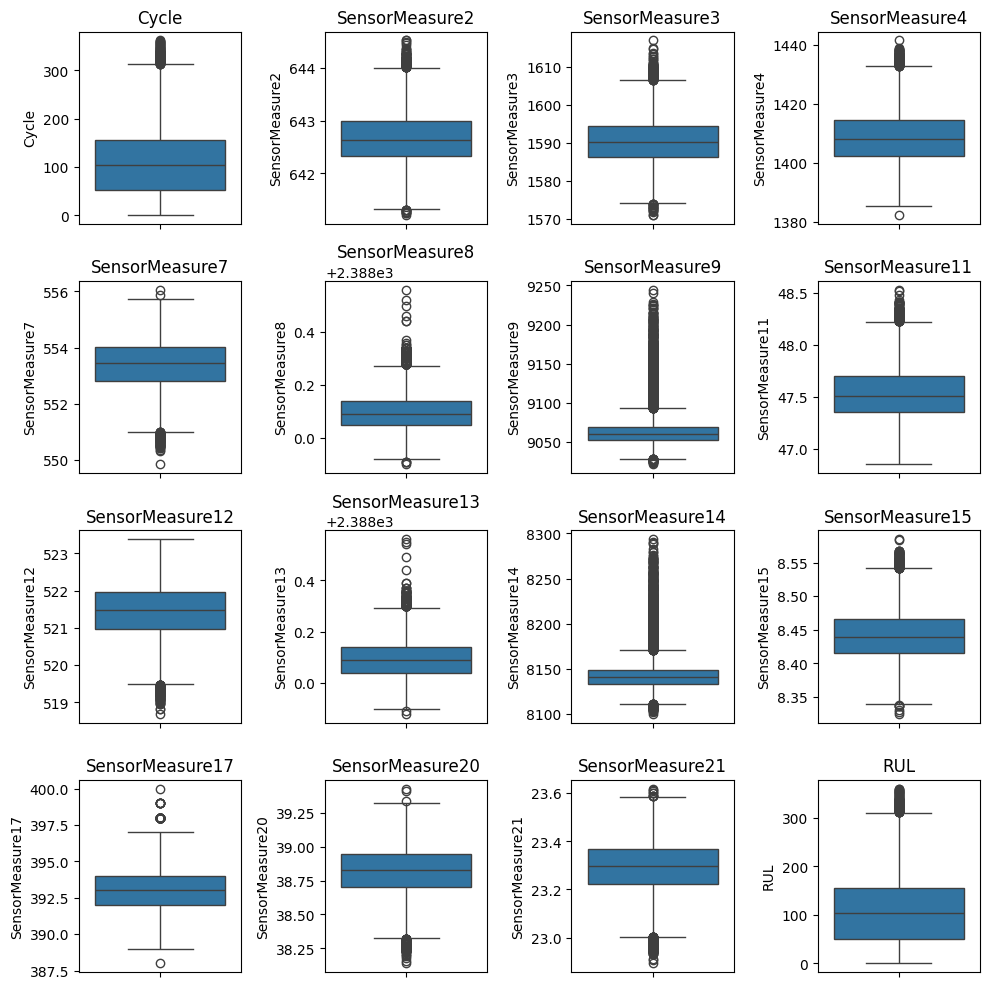

In [60]:
fig,axs = plt.subplots(4,4,figsize =(10,10))
axs = axs.flatten()
for i in range(16):
    sns.boxplot(y=df.iloc[:, i], ax=axs[i])
    axs[i].set_title(df.columns[i])

plt.tight_layout()
plt.show()

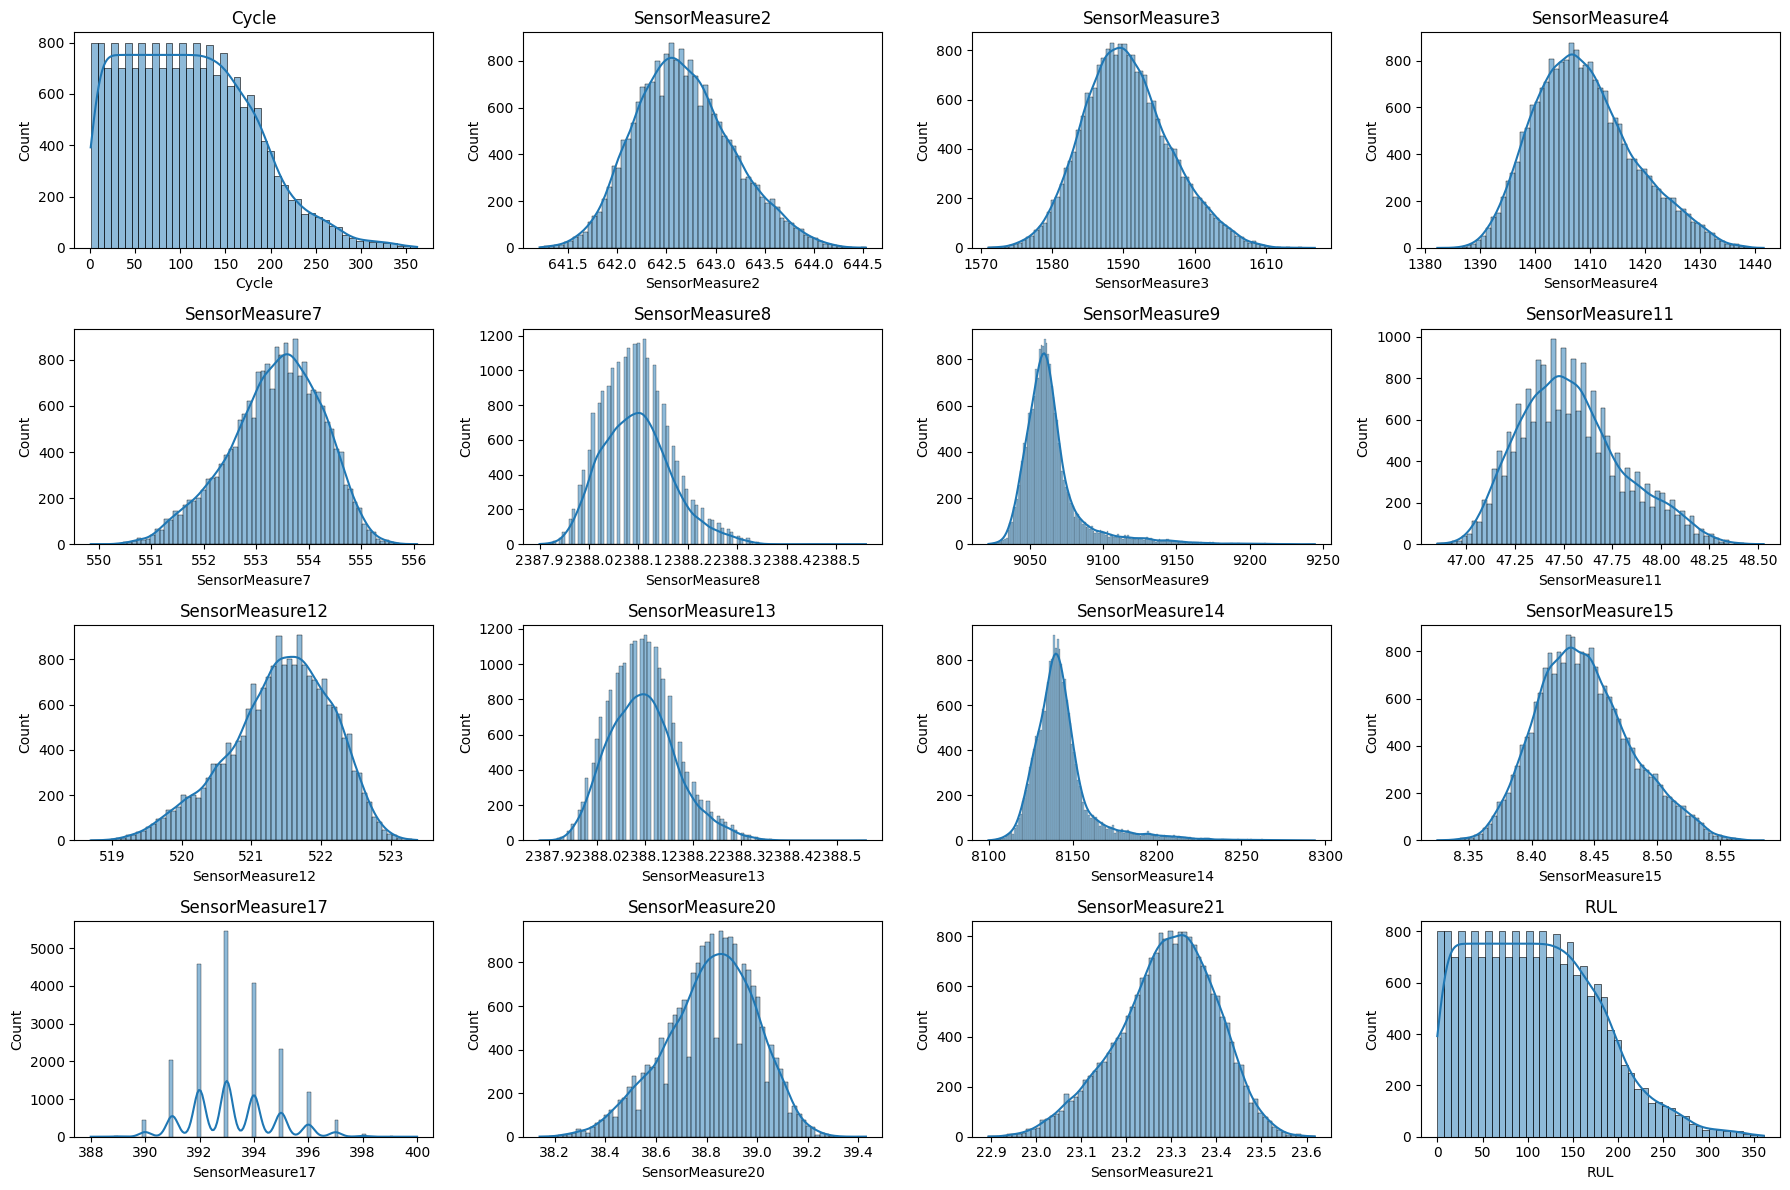

In [61]:
fig,axs = plt.subplots(4,4,figsize =(18,12))
axs = axs.flatten()
for i in range(16):
    sns.histplot(x=df.iloc[:, i], ax=axs[i],kde = True)
    axs[i].set_title(df.columns[i])

plt.tight_layout()
plt.show()

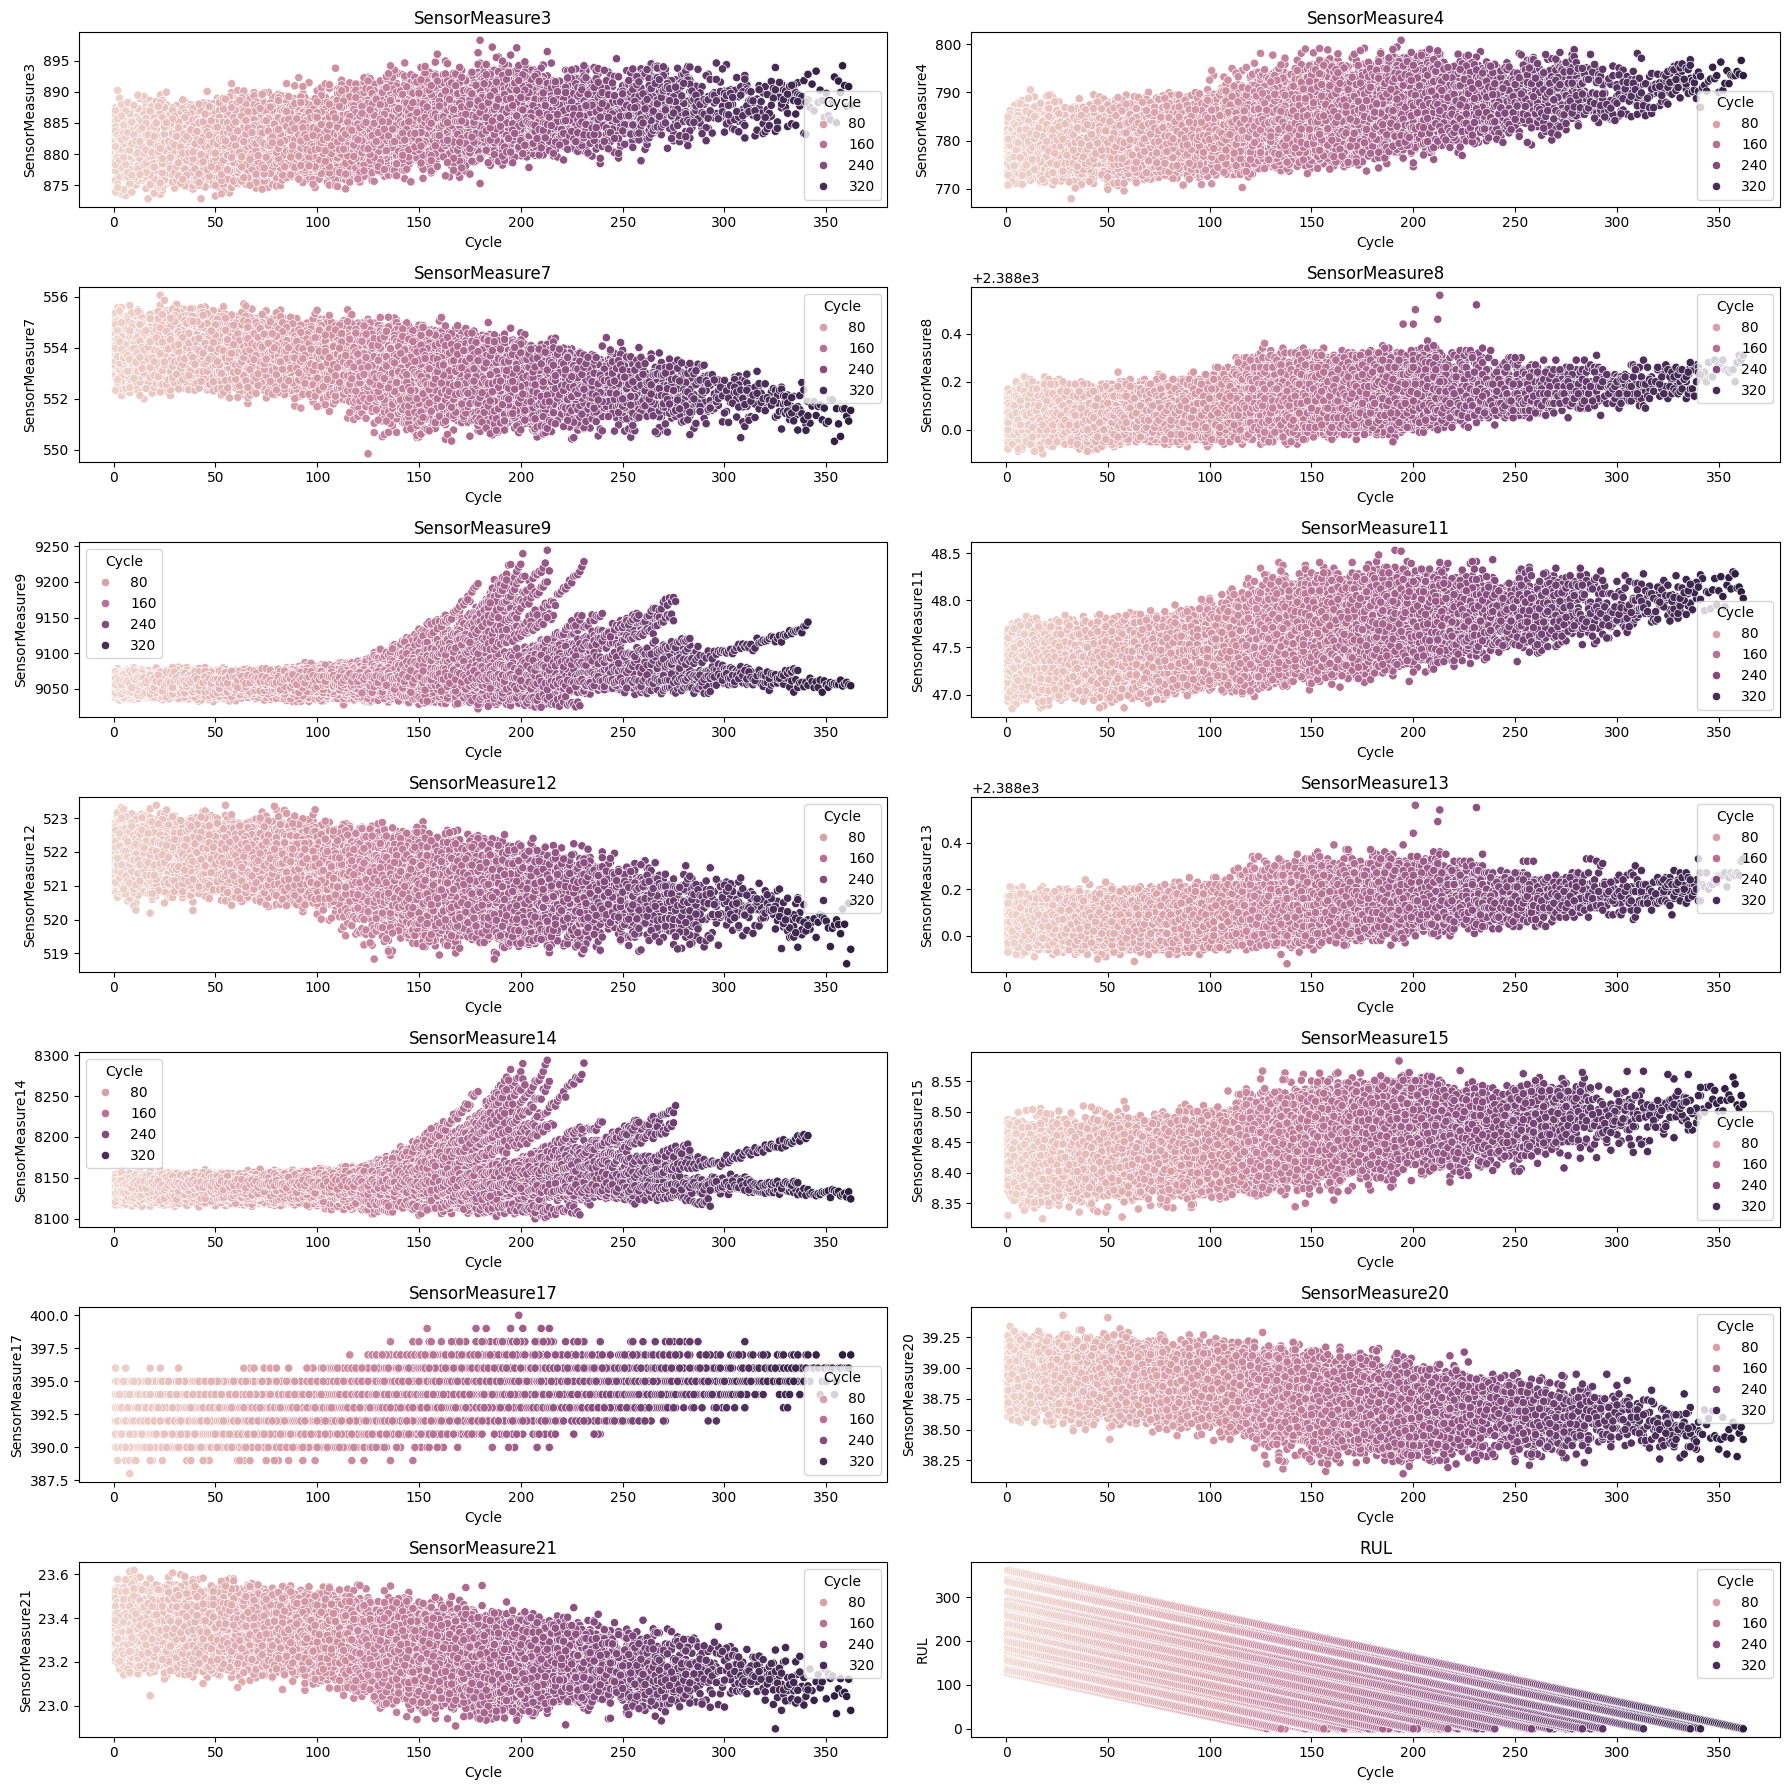

In [70]:
fig,axs = plt.subplots(7,2,figsize =(18,18))
axs = axs.flatten()
for i in range(14):
    sns.scatterplot(y=df.iloc[:, i+2],x =df.Cycle, ax=axs[i],hue = df.iloc[:,0])
    axs[i].set_title(df.columns[i+2])

plt.tight_layout()
plt.show()

### from previous description of sensor data unit, there are certain columns with international unit Norms, while certain are more specific to American Unit system

# following features/columns have data in rankine(R) which is not international unit system 
SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4

converting these into Kelvin (K)

In [63]:
df.T24,df.T30,df.T50 = df.T24* (5 / 9),df.T30* (5 / 9),df.T50* (5 / 9)


In [48]:
df

cycles     T24      T30      T50     P30       Nf       Nc   Ps30  \
0           1  641.82  1589.70  1400.60  554.36  2388.06  9046.19  47.47   
1           2  642.15  1591.82  1403.14  553.75  2388.04  9044.07  47.49   
2           3  642.35  1587.99  1404.20  554.26  2388.08  9052.94  47.27   
3           4  642.35  1582.79  1401.87  554.45  2388.11  9049.48  47.13   
4           5  642.37  1582.85  1406.22  554.00  2388.06  9055.15  47.28   
...       ...     ...      ...      ...     ...      ...      ...    ...   
20626     196  643.49  1597.98  1428.63  551.43  2388.19  9065.52  48.07   
20627     197  643.54  1604.50  1433.58  550.86  2388.23  9065.11  48.04   
20628     198  643.42  1602.46  1428.18  550.94  2388.24  9065.90  48.09   
20629     199  643.23  1605.26  1426.53  550.68  2388.25  9073.72  48.39   
20630     200  643.85  1600.38  1432.14  550.79  2388.26  9061.48  48.20   

          phi      NRf      NRc     BPR  htBleed    W31      W32    RUL  
0      521.66  2388.02  8138.62  8.4195      392  39.06  23.4190  191.0  
1      522.28  2388.07  8131.49  8.4318      392  39.00  23.4236  190.0  
2      522.42  2388.03  8133.23  8.4178      390  38.95  23.3442  189.0  
3      522.86  2388.08  8133.83  8.3682      392  38.88  23.3739  188.0  
4      522.19  2388.04  8133.80  8.4294      393  38.90  23.4044  187.0  
...       ...      ...      ...     ...      ...    ...      ...    ...  
20626  519.49  2388.26  8137.60  8.4956      397  38.49  22.9735    4.0  
20627  519.68  2388.22  8136.50  8.5139      395  38.30  23.1594    3.0  
20628  520.01  2388.24  8141.05  8.5646      398  38.44  22.9333    2.0  
20629  519.67  2388.23  8139.29  8.5389      395  38.29  23.0640    1.0  
20630  519.30  2388.26  8137.33  8.5036      396  38.37  23.0522    0.0  

[20631 rows x 16 columns]

### Model training on Deep Learning model LSTM as it is a time series data with decent amount of rows

In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [49]:
# Assuming df is your dataframe
df.columns = ['cycles', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf',
              'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL']

# Normalize the features
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.drop(columns=['RUL']))
scaled_df = pd.DataFrame(scaled_df, columns=df.columns[:-1])

# Add the RUL column back to the scaled dataframe
scaled_df['RUL'] = df['RUL']

# Split the data into training and testing sets
train_df, test_df = scaled_df.iloc[:18000], scaled_df.iloc[18000:]


In [58]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i + sequence_length]
        label = data.iloc[i + sequence_length]['RUL']
        sequences.append((sequence, label))
    return sequences

sequence_length = 15

train_sequences = create_sequences(train_df, sequence_length)
test_sequences = create_sequences(test_df, sequence_length)

# Separate the sequences into features and labels
X_train = np.array([seq[0].drop(columns=['RUL']).values for seq in train_sequences])
y_train = np.array([seq[1] for seq in train_sequences])
X_test = np.array([seq[0].drop(columns=['RUL']).values for seq in test_sequences])
y_test = np.array([seq[1] for seq in test_sequences])


In [59]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Build the LSTM model
model = Sequential()
model.add(LSTM(60, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
callbacks = [early_stopping, model_checkpoint, reduce_lr]


c:\Users\gaura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - loss: 7217.4878 - val_loss: 2540.2317
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 2204.1343 - val_loss: 1749.7336
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 1982.2965 - val_loss: 1707.3289
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 1938.4763 - val_loss: 1751.7438
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 1772.2346 - val_loss: 1830.0167
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 1766.8940 - val_loss: 1714.9727
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 1775.5072 - val_loss: 1642.0499
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 1751.9032 - val_loss: 1635.8459
Epoch 9/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 1751.1226 - val_loss: 1316.5793
Epoch 10/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 1563.7380 - val_loss: 1242.1918
Epoch 11/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 

In [63]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

model.save('best_lstm_model.keras')

# Load the best model
model = tf.keras.models.load_model('best_lstm_model.keras')

# Predict RUL
y_pred = model.predict(X_test)


82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 3320.0410
Test Loss: 3261.51025390625
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


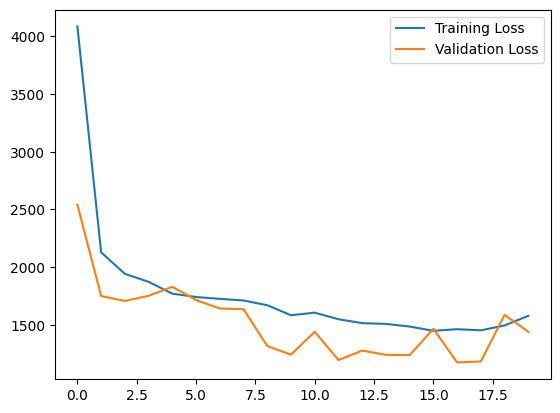

In [64]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


Mean Absolute Error: 40.03178959446945


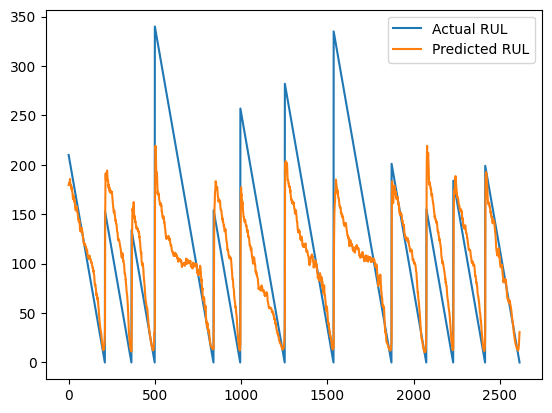

In [65]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

plt.figure()
plt.plot(y_test, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.legend()
plt.show()


In [68]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)


0.49601760423591

In [74]:
scaled_test = scaler.transform(test.drop(columns=['RUL']))
scaled_test = pd.DataFrame(scaled_test, columns=test.columns[:-1])
scaled_test['RUL'] = test['RUL']

In [75]:
test_sequences = create_sequences(scaled_test, sequence_length)

In [76]:
X_test = np.array([seq[0].drop(columns=['RUL']).values for seq in test_sequences])
y_test = np.array([seq[1] for seq in test_sequences])

In [77]:
# Predict RUL
y_pred = model.predict(X_test)

409/409 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


Mean Absolute Error: 36.01275740602259


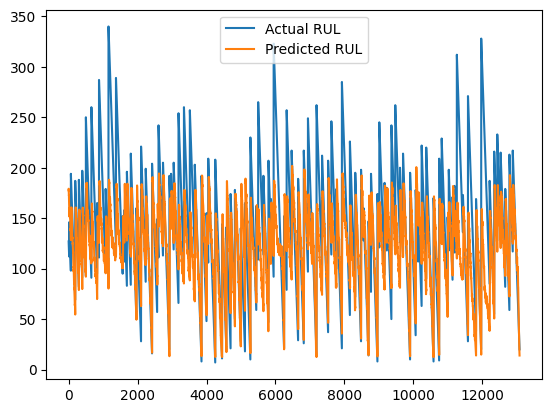

In [78]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

plt.figure()
plt.plot(y_test, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)


0.2441113698200762

model having low understanding of variation i.e., R2_score 

Using Random forest regressor with best parameters as model


In [81]:
import joblib
joblib.dump(best_rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

creating an Alert system for RUL based on current cycle

In [89]:
RUL = 200
current_cycle = 175
percentage_rul = current_cycle/RUL 
percentage_rul

0.875

In [90]:

if percentage_rul <.4:
    print("The Remaining Useful is more than 60%, \nEngine Health is Excellent")
elif percentage_rul <.6:
    print("The Remaining Useful is more than 40%, \nEngine Health is Fine")
elif percentage_rul <.80:
    print("Warning the Remaining Useful is between 60 to 80%, \nEngine need to be checked")
else:
    print("Warning the Remaining Useful is critical and less than 20%, \nEngine maintainance Required")

Warning the Remaining Useful is critical and less than 20%, 
Engine maintainance Required
